In [2]:
# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# LOAD DATASET

In [3]:
wine = load_wine(as_frame=True)
df = wine.frame.copy()

X = df.drop(columns=["target"])
y = df["target"]
feature_names = list(X.columns)
target_names = list(wine.target_names)

print("Samples:", df.shape[0])
print("Features:", feature_names)
print("Classes:", target_names)

Samples: 178
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]


# TRAIN TEST SPLIT

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ML PIPELINES

In [5]:
pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    "clf__n_estimators": [50, 100],
    "clf__max_depth": [None, 5]
}

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier())
])
param_grid_knn = {
    "clf__n_neighbors": [3, 5],
    "clf__weights": ["uniform", "distance"]
}


# TRAIN

In [6]:
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=3)
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=3)

grid_rf.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_, "CV score:", grid_rf.best_score_)
print("Best KNN params:", grid_knn.best_params_, "CV score:", grid_knn.best_score_)

# Select best model
if grid_rf.best_score_ >= grid_knn.best_score_:
    best_model_name = "RandomForest"
    best_model = grid_rf.best_estimator_
    alt_model_name = "KNN"
    alt_model = grid_knn.best_estimator_
else:
    best_model_name = "KNN"
    best_model = grid_knn.best_estimator_
    alt_model_name = "RandomForest"
    alt_model = grid_rf.best_estimator_

Best RF params: {'clf__max_depth': None, 'clf__n_estimators': 50} CV score: 0.9720744680851063
Best KNN params: {'clf__n_neighbors': 5, 'clf__weights': 'uniform'} CV score: 0.9580378250591016


# EVALUATION

In [7]:
print("\n=== Best Model:", best_model_name, "===")
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

print("\n=== Alternate Model:", alt_model_name, "===")
y_pred_alt = alt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_alt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_alt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_alt, target_names=target_names))


=== Best Model: RandomForest ===
Accuracy: 1.0
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


=== Alternate Model: KNN ===
Accuracy: 0.9722222222222222
Confusion Matrix:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      0.93      0.96        14
     class_2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97 

# FEATURE IMPORTANCE

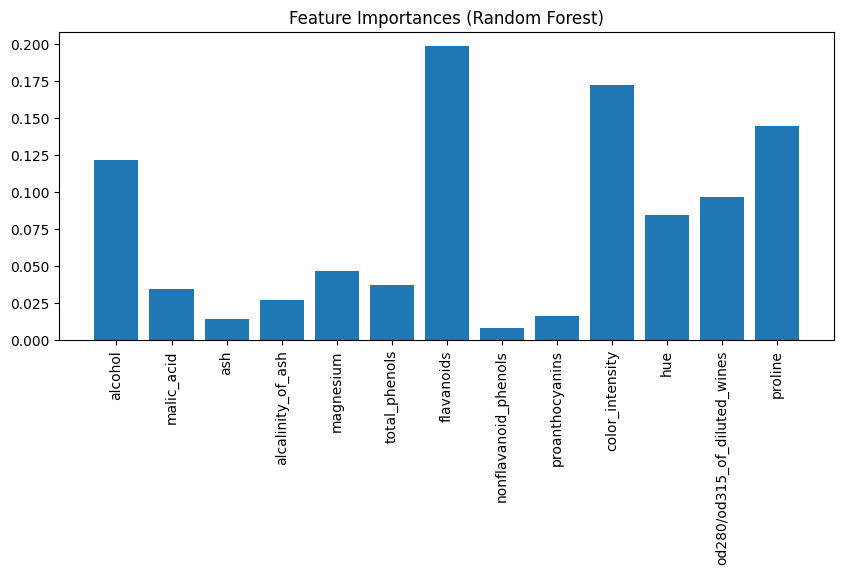

In [8]:
if best_model_name == "RandomForest":
    clf = best_model.named_steps["clf"]
    importances = clf.feature_importances_
    plt.figure(figsize=(10,4))
    plt.bar(range(len(importances)), importances, tick_label=feature_names)
    plt.xticks(rotation=90)
    plt.title("Feature Importances (Random Forest)")
    plt.show()

# VISUALIZATION

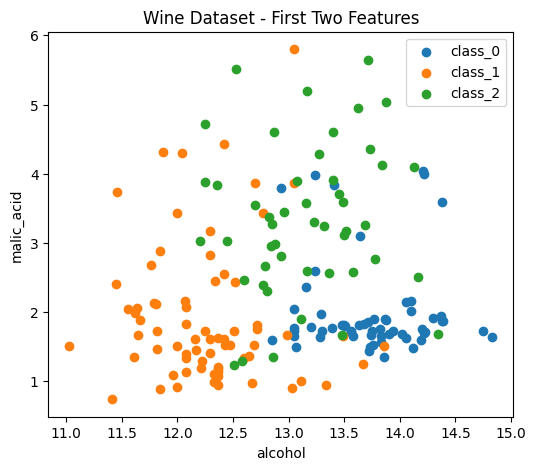

In [9]:
plt.figure(figsize=(6,5))
for i, name in enumerate(target_names):
    subset = X[y==i]
    plt.scatter(subset.iloc[:,0], subset.iloc[:,1], label=name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Wine Dataset - First Two Features")
plt.legend()
plt.show()

# PREDICTION

In [11]:
class_means = X.groupby(y).mean()
for i, row in class_means.iterrows():
    meas = row.values.reshape(1, -1)
    pred = best_model.predict(meas)[0]
    print(f"Class {i} mean → predicted as:", target_names[pred])

Class 0 mean → predicted as: class_0
Class 1 mean → predicted as: class_1
Class 2 mean → predicted as: class_2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
